<a href="https://colab.research.google.com/github/HarrisonJYU/nycparks_failedtrees/blob/working/notebook/EK_NYC_Parks_Task_3_Failed_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_failedtrees = pd.read_csv('/content/drive/My Drive/nyc-parks-data/data/FailedTrees_20210621.csv')
df_riskassessments=pd.read_csv('/content/drive/My Drive/nyc-parks-data/data/FailedTrees_RiskAssessments_20210621.csv')
df_workhistory=pd.read_csv('/content/drive/My Drive/nyc-parks-data/data/FailedTrees_WorkHistory_20210621.csv', encoding='unicode_escape')


In [ ]:
df_failedtrees.shape

(9612, 41)

In [ ]:
df_failedtrees.head()

,Tree_GlobalID,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
0,37195E1A-A7EE-4AA4-8389-19A0ED5C46F7,3/3/2015 5:00 AM,Fraxinus pennsylvanica - Green ash,3E4FEC6D-8178-4B69-B27D-5ED8DA5924E5,Tree Down - Street,3-1-1 Call Center,Work Completed,3/3/2015 5:00 AM,2015.0,3/3/2015 5:00 AM,0.0,E340A03F-0BCA-4901-9664-F75FB4F17EB0,3/2/2015 5:00 AM,Level 1,Closed,Good,10.0,Full,No,084427D3-D35D-4B23-81AD-F0DD8D235596,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,110,9.0,10,WEST 135 STREET,Street,0xD7080000010C80894E9B7E8E2E4100B63630B2BE0C41,1.001279e+06,235478.2735,No
1,8717EC83-F165-495A-A1AA-1064173A681F,3/4/2015 5:00 AM,Zelkova serrata - Japanese zelkova,AE9E5D8E-DEF9-444A-B0A8-234462E7FC94,Tree Down - Sidewalk,3-1-1 Call Center,Work Completed,3/4/2015 5:00 AM,2015.0,3/4/2015 5:00 AM,0.0,FBDF1100-326D-494D-AA78-0E1626939B95,3/3/2015 5:00 AM,Level 2,Closed,Critical,12.0,Full,No,44B18003-FE79-4AC1-8F57-5C7724886057,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,107,7.0,808,COLUMBUS AV,Street,0xD7080000010C8060F2630E532E41003885CB93F30B41,9.936712e+05,228978.4744,No
2,F763D1C0-3020-434A-AD05-F61D69CEC648,3/8/2015 5:00 AM,Pyrus calleryana - Callery pear,0EBCBE65-0135-45B9-A7CB-0AB6FA4118A5,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Work Completed,10/30/2017 3:08 PM,2017.0,11/1/2017 7:59 AM,2.0,429E0219-6229-49E5-8220-A04588A0F3CD,10/30/2017 4:00 AM,Level 2,Closed,Poor,10.0,Full,Yes,F6EE5379-9540-4A43-8473-351AA53858F8,Tree Down,791.0,32C71160-CA25-424A-99E6-99F539E3E050,8/31/2015 4:00 AM,Level 2,Closed,Poor,11.0,Full,NaN,No,Manhattan,104,3.0,340,WEST 50 STREET,Street,0xD7080000010C00C758020B242E41001800E035840A41,9.876535e+05,217222.7344,No
3,925EB161-3E0B-4F73-B45A-257B03DAF1E0,3/9/2015 4:00 AM,Pyrus calleryana - Callery pear,789317A7-7A63-4D99-B2A5-CAA00AA7403C,Limb Down - Other,3-1-1 Call Center,Work Completed,3/6/2015 5:00 AM,2015.0,3/8/2015 5:00 AM,0.0,2B3B1983-B80C-412A-9345-9D4BBF69600A,3/3/2015 5:00 AM,Level 1,Closed,Poor,4.0,Full,No,857D2135-81ED-42ED-A365-A5D9A4581E18,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,103,2.0,251,EAST 13 STREET,Street,0xD7080000010C00AF0DB46E282E41000A8C0582220941,9.882154e+05,205904.2527,No
4,560AADE4-1A81-443D-ADBA-412DCEF4899A,3/10/2015 4:00 AM,Ginkgo biloba - maidenhair tree,BD79972E-A3AE-4020-A5FF-3286AAFA8C01,Unauthorized Tree Removal,3-1-1 Call Center,Work Completed,3/6/2015 5:00 AM,2015.0,3/13/2015 4:00 AM,0.0,F0583608-5B94-4AC8-8800-F2CEE3410312,3/9/2015 4:00 AM,Level 1,Closed,Critical,2.0,Full,No,243A4BA3-EC85-47FA-80BF-C59BAC177CB6,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Brooklyn,307,38.0,187,18 STREET,Street,0xD7080000010C80416D80B9172E410086A0D3C91F0641,9.860768e+05,181241.2283,No


In [ ]:
df_failedtrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tree_GlobalID                 9612 non-null   object 
 1   Tree_CreatedDate              9612 non-null   object 
 2   Tree_Species                  9612 non-null   object 
 3   PostFail_SR_GlobalID          7969 non-null   object 
 4   PostFail_SR_Type              7969 non-null   object 
 5   PostFail_SR_Source            7969 non-null   object 
 6   PostFail_SR_ResolutionAction  7964 non-null   object 
 7   PostFail_SR_CreatedDate       7969 non-null   object 
 8   PostFail_SR_CreatedYear       7969 non-null   float64
 9   PostFail_SR_ClosedDate        7762 non-null   object 
 10  NumberOfDuplicateSRs          7969 non-null   float64
 11  PostFail_INSP_GlobalID        9612 non-null   object 
 12  PostFail_INSP_InspectionDate  9610 non-null   object 
 13  Pos

Let us first explore the relationship between tree failure and features like tree species and borough

In [ ]:
#pd.set_option("max_rows", None)
df_failedtrees['Tree_Species'].value_counts()

Acer platanoides - Norway maple                                                1038
Pyrus calleryana - Callery pear                                                 938
Platanus x acerifolia - London planetree                                        630
Tilia cordata - littleleaf linden                                               628
Unknown - Unknown                                                               454
                                                                               ... 
Tilia tomentosa 'Green Mountain' - 'Green Mountain' Silver linden                 1
Fagus sylvatica 'Asplenifolia' - 'Asplenifolia' European beech                    1
Pinus strobiformis - southwestern white pine                                      1
Alnus glutinosa - European alder                                                  1
Tilia americana 'Continental Appeal' - 'Continental Appeal' American linden       1
Name: Tree_Species, Length: 253, dtype: int64

In [ ]:
print('# of species with 100 or more occurences = ', (df_failedtrees['Tree_Species'].value_counts() >= 100).sum())
print('# of species with 1 occurence = ', (df_failedtrees['Tree_Species'].value_counts() == 1).sum())
print('# of species with 2 occurences = ', (df_failedtrees['Tree_Species'].value_counts() == 2).sum())

# of species with 100 or more occurences =  23
# of species with 1 occurence =  89
# of species with 2 occurences =  25


There are 252 different species of trees in this dataset. Species of 454 failed trees is unknown. 23 are common with 100+ instances, while the others have fewer occurences. Several species have only 1 or 2 occurences. It would be interesting to understand if this is the case because trees of those species fail less or they are just rare.

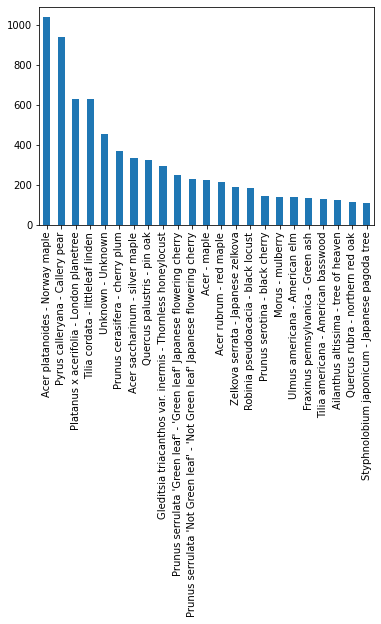

In [ ]:
df_failedtrees['Tree_Species'].value_counts()[:23].plot(kind='bar')

In [ ]:
df_failedtrees['Borough'].value_counts()

Queens           4260
Brooklyn         1705
Staten Island    1286
Bronx            1258
Manhattan        1103
Name: Borough, dtype: int64

While we know how many of these trees failed in the different boroughs, it would be interesting to see how these compare to the number of trees in each of the boroughs. 

In [ ]:
df_failedtrees['FailedDuringStorm'].value_counts()

No     4863
Yes    4749
Name: FailedDuringStorm, dtype: int64

There is almost a 1:1 distribution for trees that failed during a storm versus not.

In [ ]:
df_condition_storm = df_failedtrees.groupby(['PostFail_INSP_Condition', 'FailedDuringStorm']).size().reset_index()

In [ ]:
df_condition_storm.rename(columns={0: 'Count'}, inplace=True)

In [ ]:
df_condition_storm

,PostFail_INSP_Condition,FailedDuringStorm,Count
0,Critical,No,1689
1,Critical,Yes,1392
2,Dead,No,1734
3,Dead,Yes,1764
4,Excellent,No,3
5,Excellent,Yes,4
6,Fair,No,146
7,Fair,Yes,133
8,Good,No,131
9,Good,Yes,127


In [ ]:
df_failedtrees['PostFail_INSP_InspectionDate'] = pd.to_datetime(df_failedtrees['PostFail_INSP_InspectionDate'])
df_failedtrees['PreFail_INSP_InspectionDate'] = pd.to_datetime(df_failedtrees['PreFail_INSP_InspectionDate'])

Explore PostFail features

In [ ]:
df_failedtrees.columns

Index(['Tree_GlobalID', 'Tree_CreatedDate', 'Tree_Species',
       'PostFail_SR_GlobalID', 'PostFail_SR_Type', 'PostFail_SR_Source',
       'PostFail_SR_ResolutionAction', 'PostFail_SR_CreatedDate',
       'PostFail_SR_CreatedYear', 'PostFail_SR_ClosedDate',
       'NumberOfDuplicateSRs', 'PostFail_INSP_GlobalID',
       'PostFail_INSP_InspectionDate', 'PostFail_INSP_Type',
       'PostFail_INSP_Status', 'PostFail_INSP_Condition', 'PostFail_INSP_DBH',
       'PostFail_INSP_Structure', 'PostFail_INSP_TRM', 'PostFail_WO_GlobalID',
       'PostFail_WO_Type', 'DaysSinceInspection', 'PreFail_INSP_GlobalID',
       'PreFail_INSP_InspectionDate', 'PreFail_INSP_Type',
       'PreFail_INSP_Status', 'PreFail_INSP_Condition', 'PreFail_INSP_DBH',
       'PreFail_INSP_Structure', 'PreFail_INSP_Rating', 'PreFail_INSP_TRM',
       'Borough', 'CommunityBoard', 'CityCouncil', 'BuildingNumber',
       'StreetName', 'TreeLocation', 'Shape', 'X_Coord', 'Y_Coord',
       'FailedDuringStorm'],
      dtype='

In [ ]:
df_failedtrees['PostFail_INSP_Type'].value_counts()

Level 1                     5695
Level 2                     3826
General - Planting Space      89
Sidewalk Rating                1
Level 3                        1
Name: PostFail_INSP_Type, dtype: int64

What do Level 1, 2, 3 represent? Is it how thorough the inspections were?

Text(0, 0.5, 'Frequency')

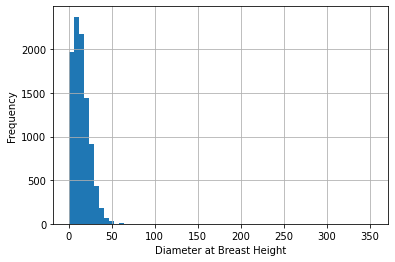

In [ ]:
df_failedtrees['PostFail_INSP_DBH'].hist(bins=60)
plt.xlabel('Diameter at Breast Height')
plt.ylabel('Frequency')

In [ ]:
df_failedtrees['PostFail_INSP_DBH'].max()

354.0

In [ ]:
df_failedtrees['PostFail_INSP_Structure'].nunique()

1

All entries have same value for PostFail Structure => not a useful variable

In [ ]:
df_failedtrees['PostFail_INSP_TRM'].value_counts()

Yes    7544
No     2068
Name: PostFail_INSP_TRM, dtype: int64

Not sure what TRM stands for...

It would be interesting to look at PreFail data to see whether it indicated that a failure was coming. 
Filter for rows that have PreFail Inspection data.

In [ ]:
df_pre_insp = df_failedtrees.dropna(subset=['PreFail_INSP_GlobalID'])

Text(0, 0.5, 'Frequency')

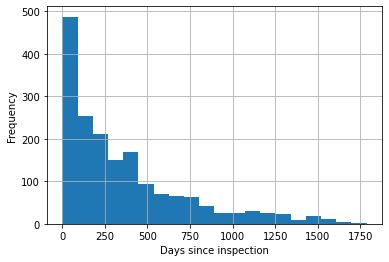

In [ ]:
df_pre_insp['DaysSinceInspection'].hist(bins=20)
plt.xlabel('Days since inspection')
plt.ylabel('Frequency')

In [ ]:
df_pre_insp['PreFail_INSP_Condition'].value_counts()

Good         612
Fair         504
Poor         312
Dead         273
Critical      69
Unknown       11
Excellent      3
Name: PreFail_INSP_Condition, dtype: int64

Below we can see the relationship between PreFailCondition and DaysSinceInspection.

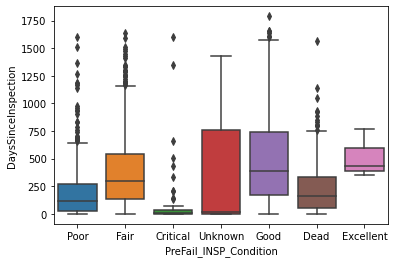

In [ ]:
sns.boxplot(x='PreFail_INSP_Condition', y='DaysSinceInspection', data=df_pre_insp)

What does it mean when a tree is Dead during PreFailInspection? Why is it not considered failed at that point? 

In [ ]:
df_pre_insp['DBH_diff'] = df_pre_insp['PostFail_INSP_DBH'] - df_pre_insp['PreFail_INSP_DBH']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


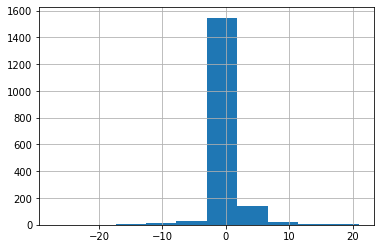

In [ ]:
df_pre_insp['DBH_diff'].hist()

Not much difference between DBH pre and post fail.

In [ ]:
df_pre_insp['PreFail_INSP_Structure'].value_counts()

Full                1760
Shaft                 13
Stump                  7
Stump - Uprooted       4
Name: PreFail_INSP_Structure, dtype: int64

In [ ]:
df_pre_insp['PreFail_INSP_Rating'].value_counts()

Low (7)         302
Low (6)         289
Low (8)         252
Low (3)         247
Moderate (9)    229
Low (5)         156
Low (4)          84
High (10)        74
High (11)        24
Extreme (12)     12
Name: PreFail_INSP_Rating, dtype: int64

In [ ]:
def group_ratings(x):
  y = ''
  if 'Low' in x:
    y = 'Low'
  elif 'Moderate' in x:
    y = 'Moderate'
  elif 'High' in x:
    y = 'High'
  elif 'Extreme' in x:
    y = 'Extreme'
  else:
    y = 'Unknown'
  return y

In [ ]:
df_pre_insp['PreFail_INSP_Rating_Grouped'] = df_pre_insp['PreFail_INSP_Rating'].apply(lambda x: group_ratings(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


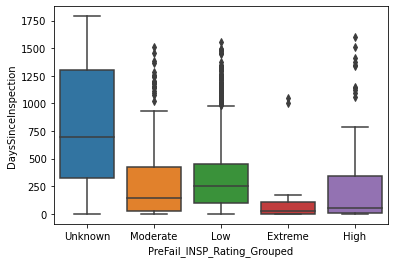

In [ ]:
sns.boxplot(x='PreFail_INSP_Rating_Grouped', y='DaysSinceInspection', data=df_pre_insp)

In [ ]:
df_pre_insp['PreFail_INSP_Rating_Grouped'].value_counts()

Low         1330
Moderate     229
Unknown      115
High          98
Extreme       12
Name: PreFail_INSP_Rating_Grouped, dtype: int64